In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
LI=load_iris()
data=LI.data
names=LI.feature_names
df=pd.DataFrame(data,columns=names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


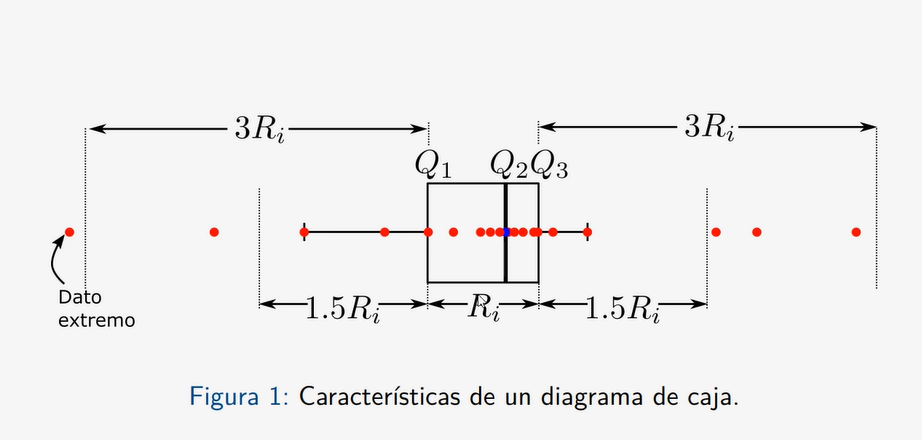

In [3]:
Q=df.quantile([0.25,0.75])
Q

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


In [4]:
# Primer quartil
Q.loc[0.25]

sepal length (cm)    5.1
sepal width (cm)     2.8
petal length (cm)    1.6
petal width (cm)     0.3
Name: 0.25, dtype: float64

In [5]:
Q.iloc[0] # Primer quartil index 0

sepal length (cm)    5.1
sepal width (cm)     2.8
petal length (cm)    1.6
petal width (cm)     0.3
Name: 0.25, dtype: float64

In [6]:
iqr=Q.iloc[1]-Q.iloc[0]
iqr

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64

## Limites

In [7]:
Ls=Q.iloc[1]+1.5*iqr
Ls

sepal length (cm)     8.35
sepal width (cm)      4.05
petal length (cm)    10.35
petal width (cm)      4.05
dtype: float64

In [8]:
Li=Q.iloc[0]-1.5*iqr
Li

sepal length (cm)    3.15
sepal width (cm)     2.05
petal length (cm)   -3.65
petal width (cm)    -1.95
dtype: float64

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df1=(df<Li)|(df>Ls)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [11]:
# Valores atipicos
df1.sum()

sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
df1['sepal width (cm)']

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal width (cm), Length: 150, dtype: bool

In [13]:
df[df1['sepal width (cm)']]['sepal width (cm)']

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64

<AxesSubplot: >

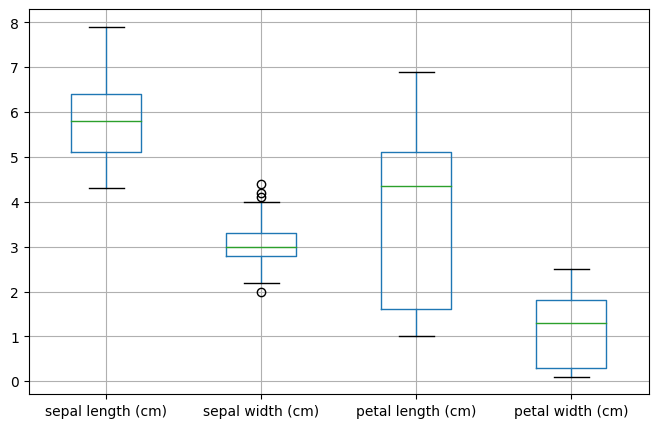

In [14]:
df.boxplot(figsize=(8,5))